# Optimize, print and plot

As the very first thing: take this [quiz](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UQ0lEVEQ2RzNTWEhNUVFTUDVIRzdOTEMzMSQlQCN0PWcu)

Today, we will be: 
1. Introducing the main package for handling numerical data **[numpy](https://numpy.org/)**.
2. Defining a utility function to be used in a optimization problem. 
3. Describing this function in figures using the library **[matplotlib](https://matplotlib.org/)**.
4. Solving a numerical optimization problems using the module **optimize** from **[scipy](https://scipy.org/)**.
5. Reporting the results in text using formatted **prints** as well as in figures. 

**More links:**

- **print**: [examples](https://www.python-course.eu/python3_formatted_output.php) (very detailed)
- **numpy**: [detailed tutorial](https://www.python-course.eu/numpy.php)
- **matplotlib**: [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py), [documentation](https://matplotlib.org/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
- **scipy-optimize**: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)

# The consumer problem

Let's first review where we are heading today.  
We want to be able to solve an economic problem with Python. 

Therefore, consider the following 2-good consumer problem with 

* utility function $u(x_1,x_2):\mathbb{R}^2_{+}\rightarrow\mathbb{R}$,
* exogenous income $I$, and 
* price-vector $(p_1,p_2)$,

given by

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Your computer can only do a specific numerical implementation:**  
Let the utility function be Cobb-Douglas,

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

We then know the solution is given by

$$
\begin{aligned}
x_1^{\ast} &= \alpha \frac{I}{p_1} \\
x_2^{\ast} &= (1-\alpha) \frac{I}{p_2}
\end{aligned}
$$

which implies that $\alpha$ is the budget share of the first good and $1-\alpha$ is the budget share of the second good.

We **know** what to do here with pen and paper.  
But how do we solve nicely using Python? This is what we'll do today..

# Numerical python (numpy)

* In L02, we only used **base Python**. The set of operations and containers baked into the core of Python. 
* Now we are importing the package **numpy** (which you got through the Anaconda distribution).  
* Numpy is **the** package for handling data going into mathmatical operations (base Python isn't great there). 
* It is build around it's container, the **ndarray**, for which there is a bunch of especially made routines. 
* The routines (multiplications, matrix algebra, etc) are highly efficient. Implemented in C-code. 
* A list (which is base Python) and a ndarray are thus different things that behave differently. 

In [1]:
import numpy as np # import the numpy module

A **numpy array** is a lot like a list but with important differences:

1. Elements must be of **one homogenous type** (ints, floats...).
2. A **slice returns a view** rather than extract content.
3. A numpy array **cannot change size** after creation (there is no append function).
4. A numpy array cannot do a list comprehension. 

Obviously, numpy arrays are less flexible things than lists.  
But that is what allows them to use more effecient mathmatical routines. 

## Basics

Numpy arrays can be **created from lists** and can be **multi-dimensional**:

In [21]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # one dimension
B = np.array([[3.4, 8.7, 9.9], 
              [1.1, -7.8, -0.7],
              [4.1, 12.3, 4.8]]) # two dimensions

print('A is a', type(A),'and B is a', type(B)) # type
print('As data is',A.dtype,'Bs data is' , B.dtype) # data type
print('A dimensions:', A.ndim, 'B dimensions:',B.ndim) # dimensions
print('shape of A:',A.shape,'shape of B:',B.shape) # shape (1d: (columns,), 2d: (row,columns))
print('size of A:',A.size,'size of B:',B.size) # size

A is a <class 'numpy.ndarray'> and B is a <class 'numpy.ndarray'>
As data is int64 Bs data is float64
A dimensions: 1 B dimensions: 2
shape of A: (10,) shape of B: (3, 3)
size of A: 10 size of B: 9


Notice that the matrix `B` was a bunch of stacked **rows**. Python is row major language. 

**Slicing** a numpy array returns a **view**, which is a **reference** to the part of the array that was sliced out.  
*Remember the points about references in L02*

In [42]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
V = A[2:6]         # V is a reference to a slice of a A

# Make changes in V and note what happens in A
V[0] = 0; V[1] = 0 
print('V =',V)
print('A =',A,'changed')     # A has changed

# If C was a copy, A wouldn't have changed
C = A.copy()
C[0] = 99
print('A =',A, 'did not change') 

V = [0 0 4 5]
A = [0 1 0 0 4 5 6 7 8 9] changed
A = [0 1 0 0 4 5 6 7 8 9] did not change


Numpy array can also be created using numpy functions:

In [ ]:
print(np.ones((2,3)))
print(np.zeros((4,2)))
print(np.linspace(0,1,6)) # linear spacing

**Tip 1:** Try pressing <kbd>Shift</kbd>+<kbd>Tab</kbd> inside a function.<br>

**Tip 2:** Try to write `?np.linspace` in a cell

In [ ]:
?np.linspace

## Math

Numpy arrays are designed for **mathematical operations**

Operations * + - / happen element-by-element between to ndarrays.

In [65]:
A = np.array([[1,0],[0,1]])
B = np.array([[2,2],[2,2]])

print('A\n',A,'\nB\n',B)
print('A+B\n',A+B,'\n') # Add 2 numpy arrays element-by-element

A
 [[1 0]
 [0 1]] 
B
 [[2 2]
 [2 2]]
A+B
 [[3 2]
 [2 3]] 



In [ ]:
# More examples
print('A-B\n',A-B,'\n')
print('A*B\n',A*B,'\n') # element-by-element product
print('A/B\n',A/B,'\n') # element-by-element division
print('A@B\n',A@B,'\n') # matrix product

**Broadcasting**  
* If arrays does not fit together **broadcasting** is applied.  
* When broadcasting, numpy uses the dimensions that **do fit** (if possible).  
* **Simple case:** multiplying a scalar (an array with 1 element) with a larger ndarray.  

In [80]:
A = np.array([[10, 20, 30], [40, 50, 60]]) # shape = (2,3) 
B = np.array([1, 2, 3]) # shape = (3,) = (1,3)

print('A\n',A, A.shape)
print('B\n',B, B.shape) # Notice the shape 'transformation' column vector!
print('\nMultiplication along columns')
print(A*B) 

A
 [[10 20 30]
 [40 50 60]] (2, 3)
B
 [1 2 3] (3,)

Multiplication along columns
[[ 10  40  90]
 [ 40 100 180]]


Another example. Note that B above did not have a 2nd dimension.  
C has explicitely 2 rows and 1 columun when created as such.

In [81]:
C = np.array([[1],[2]]) 
print(C, C.shape, '\n') 
print(A*C,'\n') # every column is multiplied by C

[[1]
 [2]] (2, 1) 

[[ 10  20  30]
 [ 80 100 120]] 



If you want to e.g. add arrays where broadcasting is not possible consider **np.newaxis**

In [ ]:
A = np.array([1, 2, 3]) # Is only 1D, shape = (3,)
B = np.array([1,2]) # Is only 1D, shape = (2,)

# You cannot broadcast B on A, because neither have 2 dimensions.
# Therefore, use newaxis
print(A[:,np.newaxis], A[:,np.newaxis].shape, '\n') # Is now (3,1)
print(B[np.newaxis,:], B[np.newaxis,:].shape, '\n') # Is now (1,2)

print(A[:,np.newaxis]*B[np.newaxis,:], '\n') # A is column vector, B is row vector
print(A[np.newaxis,:]*B[:,np.newaxis]) # A is row vector, B is column vector

**More on broadcasting:** [Documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

A lot of **mathematical procedures** can easily be performed on numpy arrays.

In [ ]:
A =  np.array([3.1, 2.3, 9.1, -2.5, 12.1])
print(np.min(A)) # find minimum
print(np.argmin(A)) # find index for minimum
print(np.mean(A)) # calculate mean
print(np.sort(A)) # sort (ascending)

**Note:** Sometimes a method can be used instead of a function, e.g. ``A.mean()``. Personally, I typically stick to functions because that always works. 

## Indexing

**Multi-dimensional** indexing is done as:

In [116]:
X = np.array([ [11, 12, 13], [21, 22, 23] ])
print('X\n',X)
print('\nX[0]\n',X[0]) # first row, all columns - you can't do the same for one column and all rows
print('\nX[1,2]\n',X[1,2]) # second row, third column
print('\nX[0:2,1:3]\n',X[0:2,1:3]) # first row, first column

X
 [[11 12 13]
 [21 22 23]]

X[0]
 [11 12 13]

X[1,2]
 23

X[0:2,1:3]
 [[12 13]
 [22 23]]


Indexes can be **logical**. Logical 'and' is `&` and logical 'or' is `|`.

In [ ]:
A = np.array([1,2,3,4,1,2,3,4])
B = np.array([3,3,3,3,2,3,2,2])
I = (A < 3) & (B == 3) # note & instead of 'and'
print(I)
print(A[I],'\n')

# Two ways of getting indices of the elements == True
print(np.where(I)) # A 'where' clause normally asks for where the True elements are.
print(I.nonzero()) # Because a True boolean is a 1 while a False is a 0.

In [ ]:
I = (A < 3) | (B == 3) # note | instead of 'or'
print(A[I])

## List of good things to know

**Attributes and methods** to know:

- size / ndim / shape
- ravel / reshape / sort
- copy

**Functions** to know:

- array / empty / zeros / ones / linspace
- mean / median / std / var / sum / percentile
- min/max, argmin/argmax / fmin / fmax / sort / clip
- meshgrid / hstack / vstack / concatenate / tile / insert
- allclose / isnan / isinf / isfinite / any / all

**Concepts** to know:

- view vs. copy
- broadcasting
- logical indexing

**Quizz:** Follow this [link](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UQlM0OUs0UkJGV0tYMzhTVU81VkFMMUdCMCQlQCN0PWcu) to take a quizz on numpy arrays. 

**Additional question:** Consider the following code:

In [199]:
A = np.array([1,2,3,4,5])
B = A[3:]
B[:] = 0

What is `np.sum(A)` equal to?
- **A:** 15
- **B:** 10
- **C:** 6
- **D:** 0
- **E:** Don't know

## Extra: Memory

Recall that matrices in memory is structured in **rows** (as opposed to columns). You can see how B (the unravelled version of A) looks - it's a row.. 

In [ ]:
A = np.array([[3.1,4.2],[5.7,9.3]])
B = A.ravel() # one-dimensional view of A
print(A.shape,A[0,:])
print(B.shape,B)

# Describing a utility function

Defining the utility function we saw above

In [203]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

`x1` and `x2` are positional arguments.  
`alpha` is a keyword argument with default value 0.50

## Print to screen

Print a **single evaluation** of the utility function.  

`f'some text'` is called a "formatted string"  
`{x1:.3f}` prints variable x1 as floating point number with 3 decimals


In [234]:
x1 = 1
x2 = 3
u = u_func(x1,x2)

print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}') 

x1 = 1.000, x2 = 3.000 -> u = 1.732


Print **multiple evaluations** of the utility function.

In [233]:
x1_list = [2,4,6,8]
x2 = 3

for x1 in x1_list: # loop through each element in x1_list
    u = u_func(x1,x2,alpha=0.25)
    print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}')

x1 = 2.000, x2 = 3.000 -> u = 2.711
x1 = 4.000, x2 = 3.000 -> u = 3.224
x1 = 6.000, x2 = 3.000 -> u = 3.568
x1 = 8.000, x2 = 3.000 -> u = 3.834


We can do this in a nicer way:

In [231]:
for i,x1 in enumerate(x1_list): # i is a counter
    u = u_func(x1,x2,alpha=0.25)
    print(f'{i:1d}: x1 = {x1:<3d} x2 = {x2:<2d} -> u = {u:<6.3f}')
    
# {i:2d}: integer a width of 2 (right-aligned)
# {x1:<3d}: integer a width of 2 (<, left-aligned)
# {u:<6.3f}: float width of 6 and 3 decimals (<, left-aligned)

0: x1 = 2   x2 = 3  -> u = 2.711 
1: x1 = 4   x2 = 3  -> u = 3.224 
2: x1 = 6   x2 = 3  -> u = 3.568 
3: x1 = 8   x2 = 3  -> u = 3.834 


Checkout [this guide](https://www.python-course.eu/python3_formatted_output.php) and [this guide](https://realpython.com/python-formatted-output/) for more info on output formatting.  

**Task**: Write a loop printing the results shown in the answer below.

In [ ]:
# write your code here

**Output:**

## Printing outputs to a file

Imagine you wanted to store outputs from your model in order to put it into a paper. Then you want it in a file..

1. Create a text-file using the `with` operator. 
2. Write to the file in a loop using the reference variable `file_ref`:

In [242]:
with open('somefile.txt', 'w') as file_ref: # 'w' is for 'write'
    
    for i, x1 in enumerate(x1_list):
        # Calculate utility at loop iteration
        u = u_func(x1,x2,alpha=0.25)
        
        # Create a formatted line of text
        text_line=f'{i+10:2d}: x1 = {x1:<6.3f} x2 = {x2:<6.3f} -> u = {u:<6.3f}'
        
        # Write the line of tex to the file using the 
        file_ref.write(text_line + '\n') # \n gives a lineshift

# note: the with clause ensures that the file is properly closed afterwards

You can also **read** from a file in the same manner, just using `r` instead of `w`.  
Open a text-file and read the lines in it and then print them:

In [ ]:
with open('somefile.txt', 'r') as file_ref: # 'r' is for 'read'
    
    # Loading ALL file content into the object lines
    lines = file_ref.readlines()
    
    # Printing each loaded line by loop
    for line in lines:
        print(line,end='') # end='' removes the extra lineshift print creates

> **Note:** You could also write tables in LaTeX format and the import them in your LaTeX document.

**Question:** was the loop inside the `with` operator strictly necessary?

## Calculate the utility function on a grid

In order to describe the shape of our utility function, we need to numerically evaluate it on a set of points. 

Thus, we calculate the utility function on a **2-dimensional grid** (`x1` and `x2`) with $N$ elements in each dimension:

In [244]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate 2d numpy arrays for x1 and x2
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays using a nested loop
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max # in [0,x_max]
        x2_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25)

**Note:** x1_values and x2_values are **both 2d**.  
This is not strictly necessary in the present case. 1d arrays would suffice below in the nested loop and filling out of u_values.  
However, it makes them isomorphic with the mesh grids used for countour plots, which often need 2d mesh grids. 

**Alternatively:** Use the corresponding numpy function to create your grid:

In [248]:
# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
u_values_mesh = u_func(x1_mesh, x2_mesh, alpha=0.25)

Dimension of grid over x1 (same as x2):  (100, 100)


* How could `u_func` evaluate utility on x1_mesh and x2_mesh?  
* Because numpy does everything *element-by-element*.  
* Do you see why we **needed** a mesh grid instead of `x1_values = x_vec`?

**Mesh grids** are a little tricky to understand, but important for creating surface plots. You can read more at:  
[GeeksforGeeks](https://www.geeksforgeeks.org/numpy-meshgrid-function/), [stack overflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) and the [numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Test whether the results are the same:

In [ ]:
# a. maximum absolute difference
max_abs_diff = np.max(np.abs(u_values-u_values_mesh))
print(max_abs_diff) # very close to zero     

# b. test if all values are "close"
print(np.allclose(u_values,u_values_alt))

**Note:** The results are not exactly the same due to floating point arithmetics.

## Plot the utility function

Import modules and state that the figures should be inlined:

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt # baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

**Constructing a plot-object in matplotlib**
1. `fig` is the figure object. It's the main "canvas" you are adding elements to.
2. `ax` is a reference to a specific subplot on the canvas (only one here)
3. Use the `ax` reference to put a diagram into the empty subplot

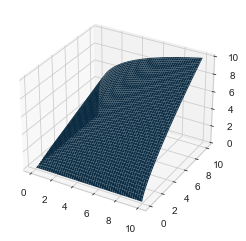

In [255]:
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

You can make the figure **zoomable** and **panable** using a **widget**:

In [ ]:
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

To restore normal plotting, turn on `inline`:

In [259]:
%matplotlib inline

**Making it pretty**: Use a colormap and set labels.  

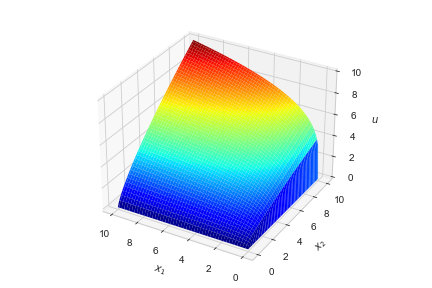

In [258]:
from matplotlib import cm # for colormaps
# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$x_1$') # Notice latex syntax
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis to bring Origin in center front
ax.invert_xaxis()
fig.tight_layout()

Saving your figure is easy:

In [ ]:
fig.savefig('someplot.pdf') # or e.g. .png 

**More formatting options?** See these [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).

**Quizz:** follow [this link](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UREZRUU1BNDdJOEZDSTNMTzNTSVg1UlZNRSQlQCN0PWcu) to take a quizz on 3d plotting.

**Task**: Construct the following plot:

![wireframeplot](https://github.com/NumEconCopenhagen/lectures-2020/raw/master/03/someplot_wireframe.png)

**Answer:**

In [ ]:
# write your code here

In [ ]:
# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values,edgecolor='black')

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('someplot_wireframe.png')
fig.savefig('someplot_wireframe.pdf')

## Summary

We have talked about:

1. Print (to screen and file)
2. Figures (matplotlib)

**Other plotting libraries:** [seaborn](https://seaborn.pydata.org/) and [bokeh](https://bokeh.pydata.org/en/latest/).

# Algorithm 1: Simple loops

Remember the problem we wanted to solve:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Idea:** Loop through a grid of $N_1 \times N_2$ hypothetical solutions.  
This is the same as solving:
$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1,x_{2} \in X_2} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N_1-1}\frac{I}{p_1},\frac{2}{N_1-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
 X_2 & = \left\{0,\frac{1}{N_2-1}\frac{I}{p_2},\frac{2}{N_2-1}\frac{ I}{p_2},\dots,\frac{ I}{p_2}\right\} \\
p_{1}x_{1}+p_{2}x_{2} & \leq I\\
\end{aligned}
$$
Where we used the budget constraint to create the **grids** $X_1$ and $X_2$

In the module **grid_solve.py**, we have functions doing that.  
We must **import** those functions before using them in the notebook.   
First 2 lines ensures that we automatically load changes to any file while editing (**aalways add this**).  
Next we load all functions from `grid_solve` (`*` means get all in general)

In [ ]:
# Ensures automatic reloading of module
%load_ext autoreload 
%autoreload 2
from grid_solve import * # Import all functions from module

Go to `grid_solve` and inspect the function `find_best_choice`. It implements the algo above.   

In [282]:
# Call function and see output
sol = find_best_choice(alpha=0.25,I=10,p1=1,p2=2,N1=500,N2=400,do_print=True)
# See printed result below 

x1 = 2.5050
x2 = 3.7469
u  = 3.3881
I-p1*x1-p2*x2 = 0.00125564


**Plot the solution:**

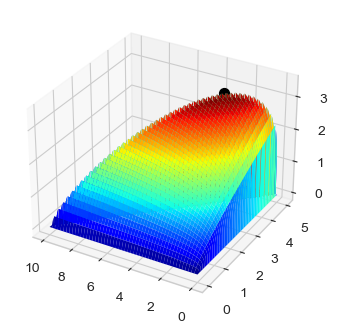

In [276]:
# %matplotlib widget
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol

# b. setup figure
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values for different choices
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
ax.invert_xaxis()

# d. plot optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='black');

# %matplotlib inline

**Quizz:** take a quick [quizz](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UOFVXRE5YSEQwVjdETDY4MDVCODlTMk5UQiQlQCN0PWcu) on plotting the simple loop.

**Task**: Can you find a better solution with higher utility and lower left-over income, $I-p_1 x_1-p_2 x_2$?

In [ ]:
# write your code here
# sol = find_best_choice()

**Hint:** think of $N$

# Algorithm 2: Use monotonicity

**Better idea:** Loop through a grid of $N$ possible solutions for $x_1$ and assume the remainder is spent on $x_2$.   
This is the same as solving:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1} x_1^{\alpha}x_2^{1-\alpha}\\
 \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N-1}\frac{}{p_1},\frac{2}{N-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
x_{2} & = \frac{I-p_{1}x_{1}}{p_2}\\
\end{aligned}
$$

Function doing just this is `find_best_choice_monotone` in `grid_solve.py`

In [283]:
# a. Calling the algo using monotonicity
sol_monotone = find_best_choice_monotone(alpha=0.25,I=10,p1=1,p2=2,N=1000)

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_monotone

x1 = 2.5025
x2 = 3.7487
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


Plot the solution:

In [303]:
plt.style.use("seaborn-whitegrid")

# a. create the figure
fig = plt.figure(figsize=(10,4))# figsize is in inches...

# b. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(x1_values,u_values)
ax_left.scatter(x1_best,u_best) # Add the solution as a dot

ax_left.set_title('value of choice, $u(x_1,x_2)$')
ax_left.set_xlabel('$x_1$')
ax_left.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(x1_values,x2_values)
ax_right.scatter(x1_best,x2_best)

ax_right.set_title('implied $x_2$ as function of $x_1$')
ax_right.set_xlabel('$x_1$')
ax_right.set_ylabel('$x_2$')
ax_right.grid(True)
plt.close(fig) # (Suppress print to fit slides) 

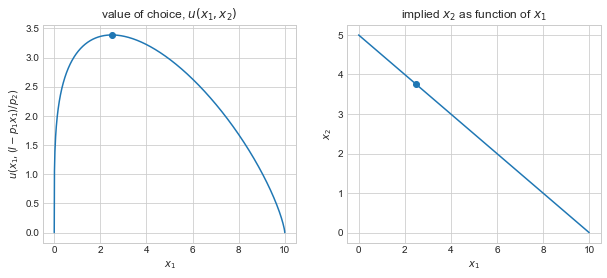

In [304]:
#Show figures of solution
fig

# Algorithm 3: Call a solver


In [305]:
# Now we use the library scipy to do the heavy lifting
from scipy import optimize

Choose paramters for economic model:

In [307]:
alpha = 0.25 # preference parameter
I = 10 # income
p1 = 1 # price 1
p2 = 2 # price 2

**Case 1**: Scalar solver using monotonicity.  
Note that we are calling a **minimizer**. Take **negative** of utility.  
Recall that we if we spend everything on good one, we get $x_1 = I/p_1$. 

In [308]:
# a. objective function (to minimize)
def value_of_choice(x1,alpha,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_func(x1,x2,alpha)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,
    method='bounded',
    bounds=(0,I/p1),
    args=(alpha,I,p1,p2)) # Notice the use of a tuple here

# c. unpack solution
x1 = sol_case1.x
x2 = (I-p1*x1)/p2
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.5000
x2 = 3.7500
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


**Case 2**: **Multi-dimensional constrained** solver, the *SLSQP*.

In [311]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    # note: x is a array, but u_func takes scalars.
    return -u_func(x[0],x[1],alpha)

# b. constraints (violated if negative) and bounds. x is an array.
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver, use SLSQP
initial_guess = [I/p1/2,I/p2/2]

sol_case2 = optimize.minimize(
    value_of_choice, initial_guess, args=(alpha,I,p1,p2),
    method='SLSQP', bounds=bounds, constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.4994
x2 = 3.7503
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000


**Case 3**: Multi-dimensional unconstrained solver with constrains implemented via penalties.

In [310]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1+p2*x2 # total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E # fac < 1 if too high expenses
        penalty += 1000*(E-I) # calculate penalty        
        x1 *= fac # force E = I
        x2 *= fac # force E = I
        
    return -u_func(x1,x2,alpha) 

In [310]:
# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.5857
x2 = 3.8786
u  = 3.5047
I-p1*x1-p2*x2 = -0.34292214


**Task:** Find the <font color='red'>**error**</font> in the code in the previous cell.

In [ ]:
# write your code here

**Answer:**

In [ ]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1+p2*x2 # total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E
        penalty += 1000*(E-I) # calculate penalty        
        x1 *= fac # force E = I
        x2 *= fac # force E = I
        
    return -u_func(x1,x2,alpha) + penalty # the error

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

# Indifference curves

Remember that the indifference curve through the point $(y_1,y_2)$ is given by the set of $x_1,x_2$ points

$$
\big\{(x_1,x_2) \in \mathbb{R}^2_+ \,|\, u(x_1,x_2) = u(y_1,y_2)\big\}
$$

To find the indifference curve: 
* fix a grid for $x_2$
* then find the corresponding $x_1$ which solves $u(x_1,x_2) = u(y_1,y_2)$ for each value of $x_2$.

In [314]:
def objective(x1,x2,alpha,u):
    return u_func(x1,x2,alpha) - u 
    # = 0 then on indifference curve with utility = u

In [312]:
def find_indifference_curve(y1,y2,alpha,N,x2_max):
    
    # a. utility in (y1,y2)
    u_y = u_func(y1,y2,alpha)
    
    # b. allocate numpy arrays
    x1_vec = np.empty(N)
    x2_vec = np.linspace(1e-8,x2_max,N)
    
    # c. loop through x2
    for i,x2 in enumerate(x2_vec):

        x1_guess = 0 # initial guess
        sol = optimize.root(objective, x1_guess, args=(x2,alpha,u_y)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec

Find and plot an inddifference curve:

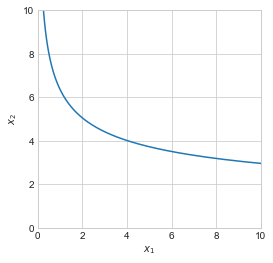

In [338]:
# a. find indifference curve through (4,4) for x2 in [0,10]
x2_max = 10
x1_vec,x2_vec = find_indifference_curve(y1=4,y2=4,alpha=0.25,N=100,x2_max=x2_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

**Task:** Find the indifference curve through $x_1 = 15$ and $x_2 = 3$ with $\alpha = 0.5$.

In [ ]:
# write your code here

In [ ]:
x2_max = 20
x1_vec,x2_vec = find_indifference_curve(y1=15,y2=3,alpha=0.5,N=100,x2_max=x2_max) 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

# A classy solution

> **Note:** This section is advanced due to the use of a module with a class. It is, however, a good example of how to structure code for solving and illustrating a model.  
> We will go into user written classes and objects later

**Load module** I have written (consumer_module.py in the same folder as this notebook).

In [323]:
from consumer_module import consumer

## Jeppe

Give birth to a consumer called **jeppe**:

In [324]:
jeppe = consumer() # create an instance of the consumer class called jeppe
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000



Solve **jeppe**'s problem.

In [325]:
jeppe.solve()
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50



## Mette

Create a new consumer, called Mette, and solve her problem.

In [326]:
mette = consumer(alpha=0.25)
mette.solve()
mette.find_indifference_curves()
print(mette)

alpha = 0.250
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 2.50
 x2 = 3.75



Make an illustration of Mette's problem and it's solution:

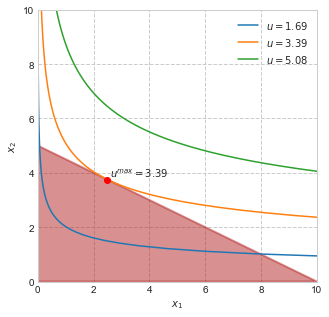

In [339]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

mette.plot_indifference_curves(ax)
mette.plot_budgetset(ax)
mette.plot_solution(ax)
mette.plot_details(ax)

**Advanced note:** Looking at the code behind the consumer class, you'll notice the 'self' argument a lot. This argument links the functions in the class definition, which holds all the instructions for behavior, and the specific object. And exactly because 'self' is the first argument in class functions, one can actually call the general class and provide it with the object one wants to evaluate a function on. 

In [321]:
# Example: 
christian = consumer()

# Calling the consumer class function and providing the object christian :
consumer.solve(christian)
print('call to consumer class: \n',christian)

# is the same as the call to the christian object directly
christian.solve()
print('call to the object christian directly: \n',christian)

call to consumer class: 
 alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50

call to the object christian directly: 
 alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50



# Summary

**This lecture:** We have talked about:

1. Numpy (view vs. copy, indexing, broadcasting, functions, methods)
2. Print (to screen and file)
3. Figures (matplotlib)
4. Optimization (using loops or scipy.optimize)
5. Advanced: Consumer class

Most economic models contain optimizing agents solving a constrained optimization problem. The tools applied in this lecture is not specific to the consumer problem in anyway.

**Your work:** Before solving Problem Set 1 read through this notebook and play around with the code. To solve the problem set, you only need to modify the code used here slightly.

**Next lecture:** Random numbers and simulation.